In [38]:
import sys
sys.path.append("../")
import helper
from statsmodels.formula.api import ols

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime, DataFrame, merge,read_csv,concat
import pandas
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from pmdarima.arima import auto_arima
import seaborn as sb
from sklearn.decomposition import PCA #Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑùÏö© Ìå®ÌÇ§ÏßÄ
from pca import pca # Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÎäî Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ìå®ÌÇ§ÏßÄ
from sklearn.linear_model import LinearRegression   #ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù Î™®Îìà
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
origin=read_excel('Ïù∏Íµ¨Î∂ÑÏÑùÏµúÏ¢Över2.xlsx')
origin.head()

ÏùçÎ©¥ÎèôÎ™Ö  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò  ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò  ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©  \
0  Ï°∞ÏπòÏõêÏùç              374              1        16       5141          21246   
1   ÎÇòÏÑ±Îèô              572              1         0          0           6687   
2   ÏïÑÎ¶ÑÎèô              236              1         7       1567          11126   
3   Í≥†Ïö¥Îèô                0              0        16        624          17157   
4   Ï¢ÖÏ¥åÎèô              160              1         2        759          13091   

    Ï†ÑÏ≤¥Ïù∏Íµ¨  ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨  Í≥µÍ≥µÍ∏∞Í¥ÄÏàò  ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò  ÎÖπÏßÄÍ∞úÏàò  Î≥ëÏõêÏàò  Î≥¥Í±¥ÏÜåÏàò  Ïû•Ïï†Ïù∏ÏãúÏÑ§  Ï≤¥Ïú°ÏãúÏÑ§Ïàò  ÌïôÍµêÏàò  \
0  43324    2.02      9       17     0   75     1      6     70   12   
1  13507    2.20      0        0     0   57     0      0     29    0   
2  23686    2.97      1        0    29   27     0      2     30    8   
3  35356    2.83      1        0    49   13     0      0     23   16   
4  28526    2.63      1        1    12   32     0      4     16    8   

   Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ  
0             6  
1             2  
2             4  
3             6  
4             5

In [3]:
origin.drop('ÏùçÎ©¥ÎèôÎ™Ö',axis=1,inplace=True)

In [4]:
origin.isna().sum()

ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò    0
ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥      0
ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò           0
ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò          0
ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©      0
Ï†ÑÏ≤¥Ïù∏Íµ¨               0
ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨             0
Í≥µÍ≥µÍ∏∞Í¥ÄÏàò              0
ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò            0
ÎÖπÏßÄÍ∞úÏàò               0
Î≥ëÏõêÏàò                0
Î≥¥Í±¥ÏÜåÏàò               0
Ïû•Ïï†Ïù∏ÏãúÏÑ§              0
Ï≤¥Ïú°ÏãúÏÑ§Ïàò              0
ÌïôÍµêÏàò                0
Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ       0
dtype: int64

In [5]:
origin.dtypes

ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò      int64
ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥        int64
ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò             int64
ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò            int64
ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©        int64
Ï†ÑÏ≤¥Ïù∏Íµ¨                 int64
ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨             float64
Í≥µÍ≥µÍ∏∞Í¥ÄÏàò                int64
ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò              int64
ÎÖπÏßÄÍ∞úÏàò                 int64
Î≥ëÏõêÏàò                  int64
Î≥¥Í±¥ÏÜåÏàò                 int64
Ïû•Ïï†Ïù∏ÏãúÏÑ§                int64
Ï≤¥Ïú°ÏãúÏÑ§Ïàò                int64
ÌïôÍµêÏàò                  int64
Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ         int64
dtype: object

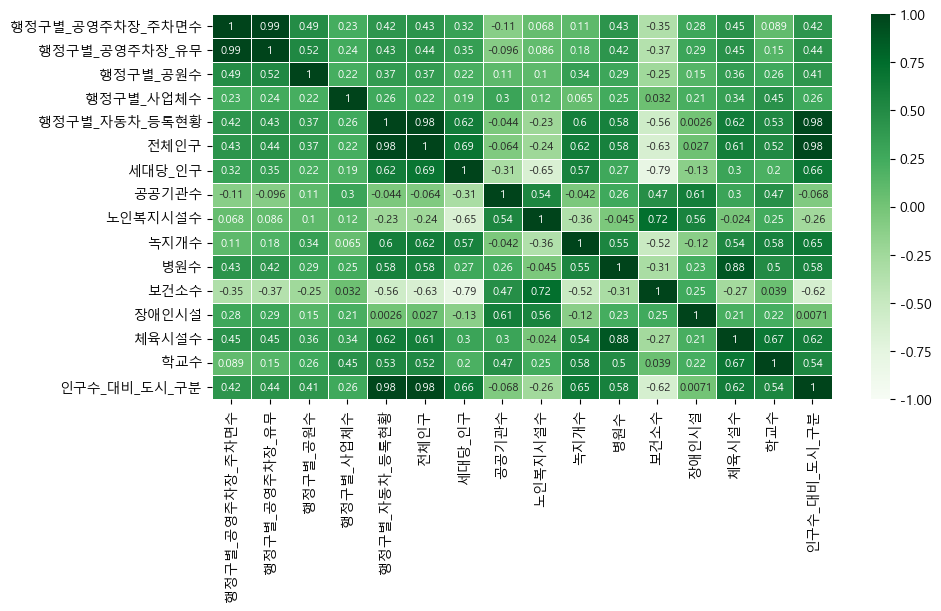

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams['axes.unicode_minus'] = False

corr = origin.corr(method='spearman')

plt.rcParams["figure.figsize"] = (10,5)

sb.heatmap(corr,
           annot = True, #Ïã§Ï†ú Í∞í ÌôîÎ©¥Ïóê ÎÇòÌÉÄÎÇ¥Í∏∞
           cmap = 'Greens', #ÏÉâÏÉÅ(Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #Ïª¨Îü¨Ï∞®Ìä∏ ÏòÅÏó≠ -1 ~ +1
           linewidths=.5, #Íµ¨Î∂ÑÏÑ† ÍµµÍ∏∞
           annot_kws={"size": 8}  # Í∏ÄÏûê ÌÅ¨Í∏∞ Ï°∞Ï†ï
)

plt.show()
plt.close()

In [19]:
cnames = []
dtypes = origin.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        # print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

['ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò', 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥', 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò', 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò', 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©', 'Ï†ÑÏ≤¥Ïù∏Íµ¨', 'ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨', 'Í≥µÍ≥µÍ∏∞Í¥ÄÏàò', 'ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò', 'ÎÖπÏßÄÍ∞úÏàò', 'Î≥ëÏõêÏàò', 'Î≥¥Í±¥ÏÜåÏàò', 'Ïû•Ïï†Ïù∏ÏãúÏÑ§', 'Ï≤¥Ïú°ÏãúÏÑ§Ïàò', 'ÌïôÍµêÏàò', 'Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ']


In [8]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî ÏßÑÌñâ

x_train_std_df, y_train_std_df = helper.scalling(origin[cnames], 'Ï†ÑÏ≤¥Ïù∏Íµ¨')
x_train_std_df.head()

ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò  ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò  ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©  \
0         2.098268       1.732051  2.630218   3.412328       2.536349   
1         3.454677       1.732051 -0.586354  -1.024482      -0.297219   
2         1.152891       1.732051  0.820896   0.327877       0.566728   
3        -0.463840      -0.577350  2.630218  -0.485955       1.740521   
4         0.632249       1.732051 -0.184283  -0.369446       0.949169   

     ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨     Í≥µÍ≥µÍ∏∞Í¥ÄÏàò   ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò      ÎÖπÏßÄÍ∞úÏàò       Î≥ëÏõêÏàò      Î≥¥Í±¥ÏÜåÏàò     Ïû•Ïï†Ïù∏ÏãúÏÑ§  \
0 -0.539518  4.084862  4.459009 -0.509857  3.251937  0.270501  3.279126   
1 -0.146479 -0.736614 -0.431517 -0.509857  2.247046 -0.811503 -0.559851   
2  1.534850 -0.200895 -0.431517  2.006882  0.572229 -0.811503  0.719808   
3  1.229154 -0.200895 -0.431517  3.742564 -0.209352 -0.811503 -0.559851   
4  0.792445 -0.200895 -0.143839  0.531553  0.851365 -0.811503  1.999467   

      Ï≤¥Ïú°ÏãúÏÑ§Ïàò       ÌïôÍµêÏàò  Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ  
0  3.882901  1.180032      1.656514  
1  1.040063 -1.147702     -0.306762  
2  1.109400  0.404120      0.674876  
3  0.624038  1.955943      1.656514  
4  0.138675  0.404120      1.165695

In [9]:
# # ÌëúÏ§ÄÌôî Í≤∞Í≥ºÎ•º ÌôúÏö©ÌïòÏó¨ Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù ÏàòÌñâ
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


PC          feature   loading  type
0   PC1            Ï≤¥Ïú°ÏãúÏÑ§Ïàò  0.360012  best
1   PC2           ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨ -0.431588  best
2   PC3  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò  0.543446  best
3   PC4        ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò  0.498170  best
4   PC5         ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò  0.758498  best
5   PC6    ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥ -0.540241  best
6   PC7            Ïû•Ïï†Ïù∏ÏãúÏÑ§  0.756051  best
7   PC8    ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©  0.466698  best
8   PC8            Í≥µÍ≥µÍ∏∞Í¥ÄÏàò -0.307816  weak
9   PC2          ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò  0.378883  weak
10  PC4             ÎÖπÏßÄÍ∞úÏàò -0.451045  weak
11  PC6              Î≥ëÏõêÏàò  0.369566  weak
12  PC2             Î≥¥Í±¥ÏÜåÏàò  0.394898  weak
13  PC3              ÌïôÍµêÏàò -0.475043  weak
14  PC8     Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ  0.441502  weak

In [10]:
cnames1=cnames.copy()
cnames1.remove('Ï†ÑÏ≤¥Ïù∏Íµ¨')
cnames1.remove('Í≥µÍ≥µÍ∏∞Í¥ÄÏàò')
cnames1.remove('Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ')
cnames1.remove('ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò')
cnames1.remove('ÎÖπÏßÄÍ∞úÏàò')
cnames1.remove('Î≥ëÏõêÏàò')
cnames1.remove('Î≥¥Í±¥ÏÜåÏàò')
cnames1.remove('ÌïôÍµêÏàò')
print(cnames1)

['ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò', 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥', 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò', 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò', 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©', 'ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨', 'Ïû•Ïï†Ïù∏ÏãúÏÑ§', 'Ï≤¥Ïú°ÏãúÏÑ§Ïàò']


In [11]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df
df3.head()

ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥  ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò  ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò  ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©  \
0         2.098268       1.732051  2.630218   3.412328       2.536349   
1         3.454677       1.732051 -0.586354  -1.024482      -0.297219   
2         1.152891       1.732051  0.820896   0.327877       0.566728   
3        -0.463840      -0.577350  2.630218  -0.485955       1.740521   
4         0.632249       1.732051 -0.184283  -0.369446       0.949169   

     ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨     Í≥µÍ≥µÍ∏∞Í¥ÄÏàò   ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò      ÎÖπÏßÄÍ∞úÏàò       Î≥ëÏõêÏàò      Î≥¥Í±¥ÏÜåÏàò     Ïû•Ïï†Ïù∏ÏãúÏÑ§  \
0 -0.539518  4.084862  4.459009 -0.509857  3.251937  0.270501  3.279126   
1 -0.146479 -0.736614 -0.431517 -0.509857  2.247046 -0.811503 -0.559851   
2  1.534850 -0.200895 -0.431517  2.006882  0.572229 -0.811503  0.719808   
3  1.229154 -0.200895 -0.431517  3.742564 -0.209352 -0.811503 -0.559851   
4  0.792445 -0.200895 -0.143839  0.531553  0.851365 -0.811503  1.999467   

      Ï≤¥Ïú°ÏãúÏÑ§Ïàò       ÌïôÍµêÏàò  Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ      Ï†ÑÏ≤¥Ïù∏Íµ¨  
0  3.882901  1.180032      1.656514  2.375853  
1  1.040063 -1.147702     -0.306762 -0.246808  
2  1.109400  0.404120      0.674876  0.648522  
3  0.624038  1.955943      1.656514  1.674999  
4  0.138675  0.404120      1.165695  1.074242

In [12]:
ols_result = helper.myOls(df3, y='Ï†ÑÏ≤¥Ïù∏Íµ¨', x = cnames1)
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                   Ï†ÑÏ≤¥Ïù∏Íµ¨   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     285.2
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           5.69e-15
Time:                        14:38:10   Log-Likelihood:                 26.320
No. Observations:                  24   AIC:                            -34.64
Df Residuals:                      15   BIC:                            -24.04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.388e-17      0.

In [13]:
ols_result.table

B   ÌëúÏ§ÄÏò§Ï∞®         Œ≤        t   Ïú†ÏùòÌôïÎ•†         VIF
Ï¢ÖÏÜçÎ≥ÄÏàò ÎèÖÎ¶ΩÎ≥ÄÏàò                                                                 
Ï†ÑÏ≤¥Ïù∏Íµ¨ ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò  -0.0583  0.041 -0.058315  -1.409*  0.179   20.106984
     ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥     0.0952  0.041  0.095204   2.319*  0.035   16.026517
     ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò         -0.0030  0.028 -0.002968  -0.107*  0.916   10.329275
     ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò        -0.0409  0.027 -0.040865  -1.515*  0.150    4.206592
     ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©     0.9342  0.041  0.934239  22.608*  0.000  240.083368
     ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨            0.0686  0.032  0.068608   2.164*  0.047    6.849611
     Ïû•Ïï†Ïù∏ÏãúÏÑ§             0.0097  0.029  0.009748   0.337*  0.740    8.755478
     Ï≤¥Ïú°ÏãúÏÑ§Ïàò             0.0186  0.045  0.018578   0.412*  0.686   39.865037

In [14]:
ols_result.varstr

['ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥ÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî -0.0583(p>0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0952(p<0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî -0.0030(p>0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥ÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî -0.0409(p>0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.9342(p<0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0686(p<0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'Ïû•Ïï†Ïù∏ÏãúÏÑ§Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0097(p>0.05)Î°ú, Ï†ÑÏ≤¥Ïù∏Íµ¨Ïó

In [24]:
ols_result.result

'ùëÖ(0.993), ùëÖ^2(0.990), ùêπ(285.2), Ïú†ÏùòÌôïÎ•†(5.69e-15), Durbin-Watson(1.926)'

In [25]:
ols_result.goodness

'Ï†ÑÏ≤¥Ïù∏Íµ¨Ïóê ÎåÄÌïòÏó¨ ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò,ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥,ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò,ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò,ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©,ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨,Ïû•Ïï†Ïù∏ÏãúÏÑ§,Ï≤¥Ïú°ÏãúÏÑ§ÏàòÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(8,15) = 285.2, p < 0.05).'

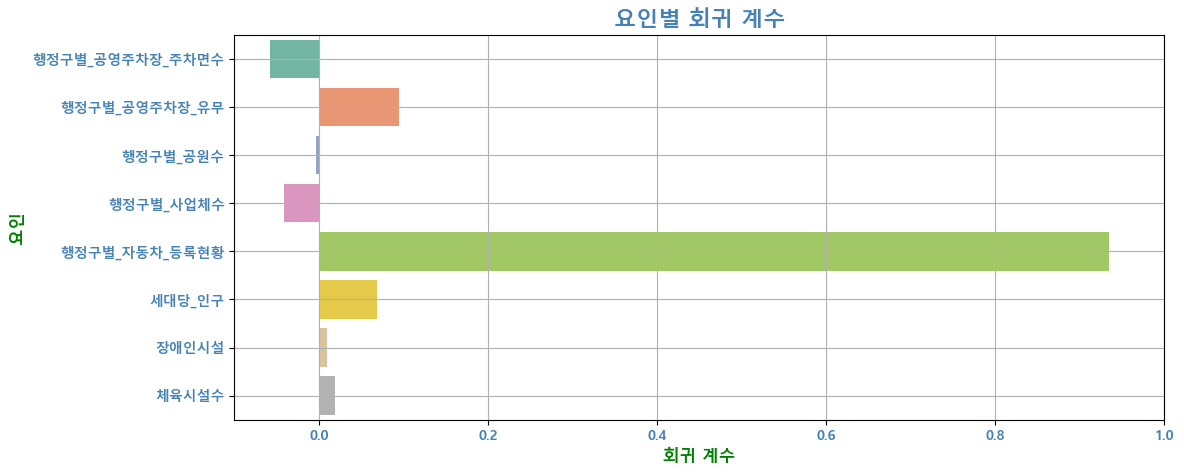

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ï£ºÏñ¥ÏßÑ ÌöåÍ∑Ä Í≥ÑÏàò Ï†ïÎ≥¥
coef_values = [
    {'name': 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò', 'coef': -0.0583},
    {'name': 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥', 'coef': 0.0952},
    {'name': 'ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò', 'coef': -0.0030},
    {'name': 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò', 'coef': -0.0409},
    {'name': 'ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©', 'coef': 0.9342},
    {'name': 'ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨', 'coef': 0.0686},
    {'name': 'Ïû•Ïï†Ïù∏ÏãúÏÑ§', 'coef': 0.0097},
    {'name': 'Ï≤¥Ïú°ÏãúÏÑ§Ïàò', 'coef': 0.0186}
]

# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
coef_df = DataFrame(coef_values)

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 5))
sns.barplot(x='coef', y='name', data=coef_df, orient='h',palette='Set2')
plt.title('ÏöîÏù∏Î≥Ñ ÌöåÍ∑Ä Í≥ÑÏàò', fontsize=16, color='steelblue',fontweight='bold')
plt.xlabel('ÌöåÍ∑Ä Í≥ÑÏàò', fontsize=12, color='green',fontweight='bold')
plt.ylabel('ÏöîÏù∏', fontsize=12, color='green',fontweight='bold')
plt.xlim(-0.1, 1.0)
plt.xticks(color='steelblue',fontweight='bold')
plt.yticks(color='steelblue',fontweight='bold')
plt.grid()
plt.show()
plt.close()


In [15]:
origin10=origin.copy()

In [16]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú ÎèÖÎ¶Ω Î≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò(y)Î•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
X = origin10.drop(columns=['Ï†ÑÏ≤¥Ïù∏Íµ¨'])  # Ï¢ÖÏÜç Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïó¥
y = origin10['Ï†ÑÏ≤¥Ïù∏Íµ¨']  # Ï¢ÖÏÜç Î≥ÄÏàò

# StandardScalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôîÌï©ÎãàÎã§.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï†Ìï©ÎãàÎã§.
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3)

# LinearRegression Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÌï©ÎãàÎã§.
model = LinearRegression()
model.fit(X_train, y_train)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_train_pred = model.predict(X_train)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_valid_pred = model.predict(X_valid)

# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ MSE:", train_mse)
print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ MSE:", valid_mse)
print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ R-squared:", train_r2)
print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ R-squared:", valid_r2)


ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ MSE: 2.143431762278033e-22
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ MSE: 51268338.37127009
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ R-squared: 1.0
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ R-squared: 0.7435993624182902


> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ MSE (Mean Squared Error): ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏Ïùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®Îäî Í±∞Ïùò 0Ïóê Í∞ÄÍπùÏäµÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º ÏôÑÎ≤ΩÌïòÍ≤å ÎßûÏ∂îÍ≥† ÏûàÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. ÌïòÏßÄÎßå Ïù¥Í≤ÉÏùÄ Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï©ÎêòÏóàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎÑàÎ¨¥ Ï†ÅÌï©ÌïòÍ≤å ÎêòÎ©¥ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏùºÎ∞òÌôî Îä•Î†•Ïù¥ Ï†ÄÌïòÎê† Ïàò ÏûàÏäµÎãàÎã§.

> Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ MSE: Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏Ïùò MSEÎäî ÏÉÅÎãπÌûà ÎÜíÏäµÎãàÎã§. Ïù¥ Í∞íÏùÄ Î™®Îç∏Ïù¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÌÅ¨Îã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï©ÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏°Ïù¥ Î∂ÄÏ†ïÌôïÌïú Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ R-squared: ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú R-squared (Í≤∞Ï†ï Í≥ÑÏàò) Í∞íÏùÄ 1.0ÏúºÎ°ú, Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º ÏôÑÎ≤ΩÌïòÍ≤å ÏÑ§Î™ÖÌïòÍ≥† ÏûàÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Îã§Ïãú, Ïù¥Í≤ÉÏùÄ Í≥ºÏ†ÅÌï©Ïùò Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

> Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ R-squared: Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú R-squared Í∞íÏùÄ 0.74Î°ú, Î™®Îç∏Ïù¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞ Ï§ë ÏïΩ 74%Î•º ÏÑ§Î™ÖÌïòÍ≥† ÏûàÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥ Í∞íÏùÄ Î™®Îç∏Ïù¥ ÏùºÎ∂Ä Ï†ïÎ≥¥Î•º Ïûò ÏÑ§Î™ÖÌïòÍ≥† ÏûàÏßÄÎßå, Ïó¨Ï†ÑÌûà Í∞úÏÑ†Ïùò Ïó¨ÏßÄÍ∞Ä ÏûàÎäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

> Ï¢ÖÌï©Ï†ÅÏúºÎ°ú, Ïù¥ Î™®Îç∏ÏùÄ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Îß§Ïö∞ ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÏßÄÎßå, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏòàÏ∏° Î∂àÏïàÏ†ïÏÑ±Ïù¥ ÏûàÍ≥†, Í≥ºÏ†ÅÌï©Ïùò Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ∞ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ©ÎãàÎã§. Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Î™®Îç∏ÏùÑ Ï°∞Ï†ïÌïòÍ±∞ÎÇò Îã§Î•∏ Î™®Îç∏ÏùÑ Í≥†Î†§ÌïòÎäî Í≤ÉÏù¥ Ïú†Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.







### Í∞ÅÍ∞ÅÏùò ÏöîÏù∏Î≥Ñ Ï§ëÏöîÎèÑ ÌôïÏù∏

In [17]:
# ÌöåÍ∑Ä Í≥ÑÏàò(coefficients)Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
coefficients = model.coef_
intercept = model.intercept_

# Í∞Å ÌîºÏ≤òÏùò ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

print(f"Intercept: {intercept}")

ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ï£ºÏ∞®Î©¥Ïàò: 2940.936999744619
ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏòÅÏ£ºÏ∞®Ïû•_Ïú†Î¨¥: -1538.7878391648585
ÌñâÏ†ïÍµ¨Î≥Ñ_Í≥µÏõêÏàò: -1464.5579510111477
ÌñâÏ†ïÍµ¨Î≥Ñ_ÏÇ¨ÏóÖÏ≤¥Ïàò: 837.8468600655342
ÌñâÏ†ïÍµ¨Î≥Ñ_ÏûêÎèôÏ∞®_Îì±Î°ùÌòÑÌô©: 24245.39169239684
ÏÑ∏ÎåÄÎãπ_Ïù∏Íµ¨: 1232.1908666212205
Í≥µÍ≥µÍ∏∞Í¥ÄÏàò: -2326.282324391809
ÎÖ∏Ïù∏Î≥µÏßÄÏãúÏÑ§Ïàò: 678.0762677439945
ÎÖπÏßÄÍ∞úÏàò: -471.2926309399049
Î≥ëÏõêÏàò: -1954.0507844210938
Î≥¥Í±¥ÏÜåÏàò: -1959.993821151291
Ïû•Ïï†Ïù∏ÏãúÏÑ§: 2637.3656246890523
Ï≤¥Ïú°ÏãúÏÑ§Ïàò: -258.56197372231253
ÌïôÍµêÏàò: 2803.799854351316
Ïù∏Íµ¨Ïàò_ÎåÄÎπÑ_ÎèÑÏãú_Íµ¨Î∂Ñ: -13946.526637470952
Intercept: 15222.717123965587


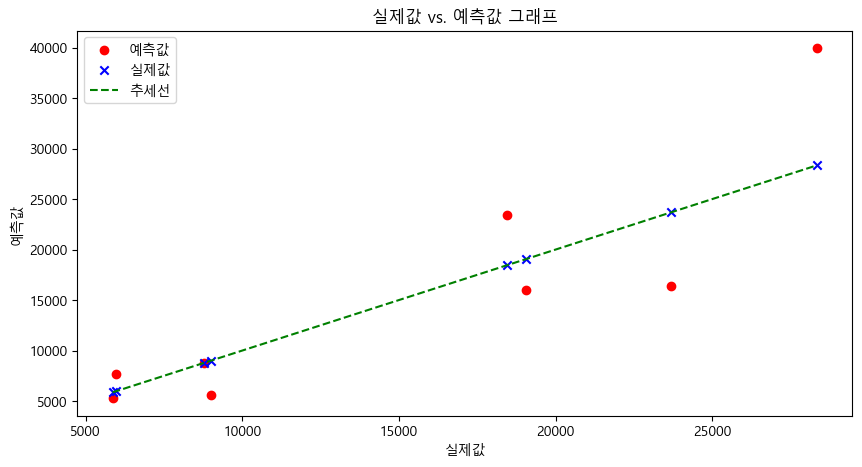

In [40]:
# Ïã§Ï†úÍ∞í vs. ÏòàÏ∏°Í∞í Í∑∏ÎûòÌîÑ (ÏòàÏ∏°Í∞í: Îπ®Í∞ÑÏÉâ Ï†ê, Ïã§Ï†úÍ∞í: ÌååÎûÄÏÉâ Ï†ê)
plt.scatter(y_valid, y_valid_pred, color='red', marker='o', label='ÏòàÏ∏°Í∞í')
plt.scatter(y_valid, y_valid, color='blue', marker='x', label='Ïã§Ï†úÍ∞í')

# Ï∂îÏÑ∏ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ xÏôÄ y Í∞íÏùò Î∞∞Ïó¥ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
x_range = np.linspace(min(y_valid), max(y_valid), 100)  # x Î≤îÏúÑÎ•º Ïã§Ï†úÍ∞íÏùò Î≤îÏúÑÎ°ú ÏÑ§Ï†ï
y_range = x_range  # Ï∂îÏÑ∏ÏÑ†ÏùÄ y=x ÌòïÌÉú

# Ï∂îÏÑ∏ÏÑ† Í∑∏Î¶¨Í∏∞
plt.plot(x_range, y_range, color='green', linestyle='--', label='Ï∂îÏÑ∏ÏÑ†')

plt.xlabel("Ïã§Ï†úÍ∞í")
plt.ylabel("ÏòàÏ∏°Í∞í")
plt.title("Ïã§Ï†úÍ∞í vs. ÏòàÏ∏°Í∞í Í∑∏ÎûòÌîÑ")
plt.legend()
plt.show()

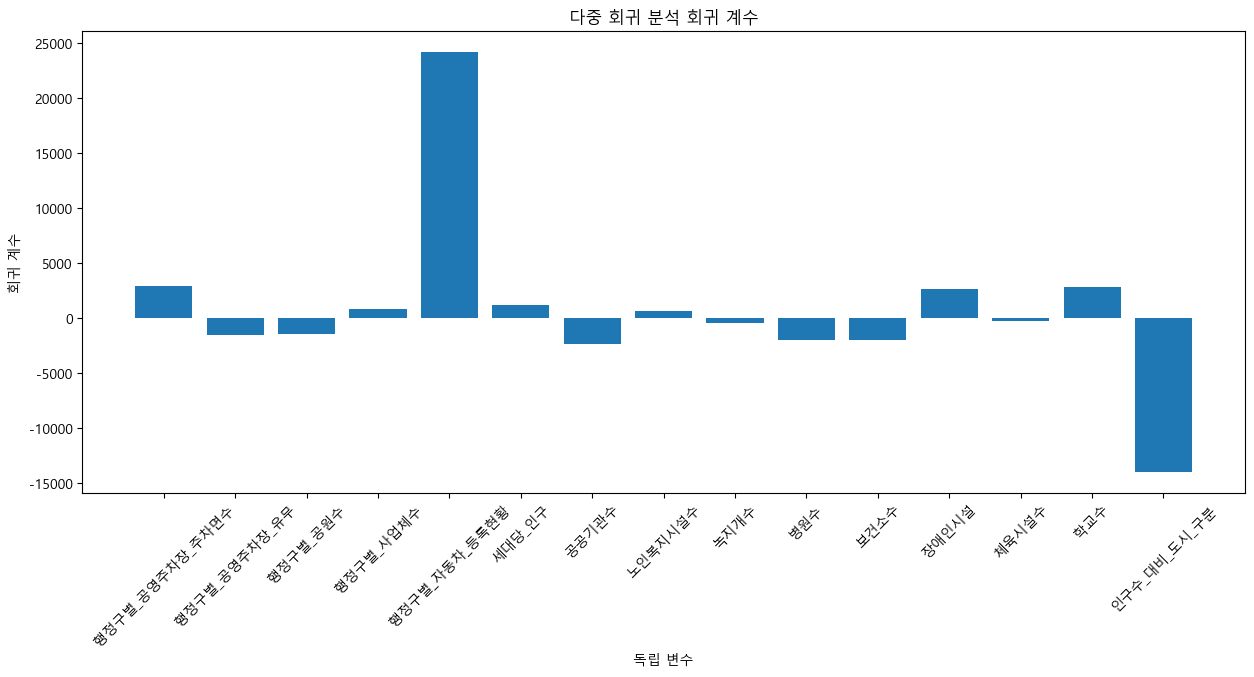

In [18]:
# Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Ïù¥Î¶ÑÍ≥º ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Ïó∞Í≤∞ÌïòÎäî ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
plt.figure(figsize=(15, 6))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=45)  # xÏ∂ï ÎààÍ∏àÏùÑ 45ÎèÑ ÌöåÏ†Ñ
plt.xlabel("ÎèÖÎ¶Ω Î≥ÄÏàò")
plt.ylabel("ÌöåÍ∑Ä Í≥ÑÏàò")
plt.title("Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑù ÌöåÍ∑Ä Í≥ÑÏàò")
plt.show()